In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
# import multiprocessing as mp
from pandarallel import pandarallel

In [17]:
telemetry_data_fp = "./Telemetry Data"
# For now, we will only focus on 1 practice session: FP3
df_fp2 = pd.read_csv(telemetry_data_fp + "/T1_Baku_FP2.csv", sep='\t')
df_fp3 = pd.read_csv(telemetry_data_fp + "/T3_Baku_FP3.csv", sep='\t')
df_quali = pd.read_csv(telemetry_data_fp + "/T4_Baku_Qualifying.csv", sep='\t')
df_race = pd.read_csv(telemetry_data_fp + "/T5_Baku_Race.csv", sep='\t')
# Show first 5 rows
df_fp3.head(5)

,carId,trackId,trackLength,lapIndex,lapNum,lapFlag,binIndex,validBin,lap_number,lap_distance,...,front_left_wing_damage,front_right_wing_damage,rear_wing_damage,engine_damage,gear_box_damage,ers_store,ers_deployMode,ers_harv_mguk,ers_harv_mguh,ers_deployed
0,Renault,Baku,5994,0,0,0,0,1,0,0.552961,...,0.0,0.0,0,0.7,0.37,3540390.0,2,0.0,181829.0,640634.0
1,Renault,Baku,5994,0,0,0,1,1,0,1.446020,...,0.0,0.0,0,0.7,0.37,3540150.0,2,0.0,145463.0,512507.0
2,Renault,Baku,5994,0,0,0,2,1,0,2.339080,...,0.0,0.0,0,0.7,0.37,3539900.0,2,0.0,109097.0,384380.0
3,Renault,Baku,5994,0,0,0,3,1,0,3.232140,...,0.0,0.0,0,0.7,0.37,3539660.0,2,0.0,72731.6,256254.0
4,Renault,Baku,5994,0,0,0,4,1,0,4.125200,...,0.0,0.0,0,0.7,0.37,3539410.0,2,0.0,36365.8,128127.0


In [18]:
# We want to get the list of data categories
data_categories = list(df_fp3.columns)
# We will reshape our 161 1D list into a 2D list of parameters with 23 groups of 7 (just to make viewing this easier)
print(tabulate(np.array(data_categories).reshape(-1,7), maxcolwidths=8, tablefmt="rounded_grid"))

╭──────────┬──────────┬──────────┬──────────┬──────────┬──────────┬──────────╮
│ carId    │ trackId  │ trackLen │ lapIndex │ lapNum   │ lapFlag  │ binIndex │
│          │          │ gth      │          │          │          │          │
├──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ validBin │ lap_numb │ lap_dist │ lap_time │ lap_time │ world_po │ world_po │
│          │ er       │ ance     │          │ _invalid │ sition_X │ sition_Y │
├──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ world_po │ world_fo │ world_fo │ world_fo │ world_ri │ world_ri │ world_ri │
│ sition_Z │ rward_X  │ rward_Y  │ rward_Z  │ ght_X    │ ght_Y    │ ght_Z    │
├──────────┼──────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ velocity │ velocity │ velocity │ gforce_X │ gforce_Y │ gforce_Z │ pit_stat │
│ _X       │ _Y       │ _Z       │          │          │          │ us       │
├──────────┼──────────┼──────────┼──────────┼───────

Note that these stats can contain invalid laps (caused by track infractions), and so we shouldn't consider these during calculations

In [19]:
# Ensure we are dealing with valid data only
valid_df_fp2 = df_fp2[df_fp2["lap_time_invalid"] > -1]
valid_df_fp3 = df_fp3[df_fp3["lap_time_invalid"] > -1]
valid_df_quali = df_quali[df_quali["lap_time_invalid"] > -1]
valid_df_race = df_race[df_race["lap_time_invalid"] > -1]

# pool = mp.Pool(4) # use 4 processes

# We also need to fix a few off-by-one errors for lap numbers, race position, etc
# This is taking too long to update each df individually since they all have over 30,000 rows
# We can parallelize the updates for each df asynchronously
# pool.apply_async(lambda df: df.update(df[["lapIndex", "lapNum", "lap_number", "race_position"]].apply(lambda x: x + 1, axis=1), overwrite=False),  [valid_df_fp2, valid_df_fp3, valid_df_quali, valid_df_race])
pandarallel.initialize(progress_bar=True)
updated_df_fp2 = valid_df_fp2[["lapIndex", "lapNum", "lap_number", "race_position"]].parallel_apply(lambda x: x + 1, axis=1) # type: ignore
updated_df_fp3 = valid_df_fp3[["lapIndex", "lapNum", "lap_number", "race_position"]].parallel_apply(lambda x: x + 1, axis=1) # type: ignore
updated_df_quali = valid_df_quali[["lapIndex", "lapNum", "lap_number", "race_position"]].parallel_apply(lambda x: x + 1, axis=1) # type: ignore
updated_df_race = valid_df_race[["lapIndex", "lapNum", "lap_number", "race_position"]].parallel_apply(lambda x: x + 1, axis=1) # type: ignore

valid_df_fp2.update(updated_df_fp2)
valid_df_fp3.update(updated_df_fp3)
valid_df_quali.update(updated_df_quali)
valid_df_race.update(updated_df_race)

valid_df_fp3.head(5)



INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,carId,trackId,trackLength,lapIndex,lapNum,lapFlag,binIndex,validBin,lap_number,lap_distance,...,front_left_wing_damage,front_right_wing_damage,rear_wing_damage,engine_damage,gear_box_damage,ers_store,ers_deployMode,ers_harv_mguk,ers_harv_mguh,ers_deployed
0,Renault,Baku,5994,1,1,0,0,1,1,0.552961,...,0.0,0.0,0,0.7,0.37,3540390.0,2,0.0,181829.0,640634.0
1,Renault,Baku,5994,1,1,0,1,1,1,1.446020,...,0.0,0.0,0,0.7,0.37,3540150.0,2,0.0,145463.0,512507.0
2,Renault,Baku,5994,1,1,0,2,1,1,2.339080,...,0.0,0.0,0,0.7,0.37,3539900.0,2,0.0,109097.0,384380.0
3,Renault,Baku,5994,1,1,0,3,1,1,3.232140,...,0.0,0.0,0,0.7,0.37,3539660.0,2,0.0,72731.6,256254.0
4,Renault,Baku,5994,1,1,0,4,1,1,4.125200,...,0.0,0.0,0,0.7,0.37,3539410.0,2,0.0,36365.8,128127.0


In [20]:
# Initial Descriptive Analysis

# We use the binIndex to get the completed lap. In high frequency streams of data, 
# we usually divide data into bins, which represent either a segment of time or distance
# this way, we can improve organization and performance by discretizing the continous data

# We will first get the max bin index to figure out how many bins we make (it's around 5994 bins)

max_bin_index = valid_df_fp3["binIndex"].max()
completed_laps_fp2 = valid_df_fp2[valid_df_fp2["binIndex"] == max_bin_index].reset_index(drop=True)
completed_laps_fp3 = valid_df_fp3[valid_df_fp3["binIndex"] == max_bin_index].reset_index(drop=True)
completed_laps_quali = valid_df_quali[valid_df_quali["binIndex"] == max_bin_index].reset_index(drop=True)
completed_laps_race = valid_df_race[valid_df_race["binIndex"] == max_bin_index].reset_index(drop=True)

completed_laps_fp3_pretty_print = completed_laps_race.head(10)
print(tabulate(completed_laps_fp3_pretty_print, tablefmt="rounded_grid", headers=completed_laps_fp3_pretty_print.columns), end="\n\n")

# Our forward velocity is velocity_X
velocity_description = completed_laps_fp2["velocity_X"].describe()
print(velocity_description, end="\n\n")

# We do have to note here that the these velocities won't be the complete picture since we are looking at 
# the velocity upon lap completion while it may be high since the lap usually completes on a straight, it won't always be the case. 
# For example, here in Baku, we actually achieved a slightly higher velocity elsewhere on the track 
# because we carried forward the speed from our previous flying lap during the 1st lap
# A more accurate velocity analysis would be using valid_df and finding the peak velocity across all points on the track

# More useful summaries for completed laps would be for parameters such as lap time, 
# or parameters that only matter on a lap-by-lap basis
lap_time_description = completed_laps_fp3["lap_time"].describe()
print(lap_time_description, end="\n\n")

# we can sort the lap_times to rank our fastest laps
sorted_laps = completed_laps_fp3.copy()
sorted_laps.sort_values(by="lap_time", inplace=True)
sorted_laps[["lapNum", "lap_time", "race_position"]].reset_index(drop=True)

╭────┬─────────┬───────────┬───────────────┬────────────┬──────────┬───────────┬────────────┬────────────┬──────────────┬────────────────┬────────────┬────────────────────┬────────────────────┬────────────────────┬────────────────────┬───────────────────┬───────────────────┬───────────────────┬─────────────────┬─────────────────┬─────────────────┬──────────────┬──────────────┬──────────────┬──────────────┬────────────┬─────────────┬──────────────┬─────────────────┬────────────────┬────────────┬─────────┬──────────┬────────────┬────────┬───────┬────────────┬─────────┬───────────────────┬───────────────────┬───────────────────┬───────────────────┬─────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┬─────────────────┬─────────────────┬─────────────────┬─────────────────┬──────────────────────┬──────────────────────┬─────────

,lapNum,lap_time,race_position
0,2,109.505,1
1,1,110.487,6
2,3,111.690,1
3,6,113.457,1
4,8,114.029,1
5,7,114.580,1
6,5,114.860,1
7,4,115.618,1


In [30]:
# Lap times are also influenced by tire compounds, we can actually group the sorted times based on tire compounds and output them
# Although, rather than outputting the tire compound number, it's best to translate it to the corresponding compound name
# See the F1 2019 Spec sheet in the README for specific translations

actual_tyre_compound_map = {
    "16": "C5", # Softest tyre compound
    "17": "C4",
    "18": "C3",
    "19": "C2",
    "20": "C1", # Hardest tyre compound
    "7": "Intermediate",
    "8": "Wet"
}

wet_tyre_compounds = [7, 8]

# We need to actually figure out what the Soft, Medium, and Hard compounds are for the weekend
# since 3/5 of the dry compounds are used for the track depending on how abrasive the track is
# and if there are high temperatures
# We will get the Soft compound from Quali to then map to the compound map
# If the tyres are not dry tires, we will need to find the unique set from FP1 - FP3
# Later on, when I make my own Telemetry Interpreter, I'll include both the actual and visual compound parameters
# so I don't have to do this guess work (since it is possible for the race weekend to be completely wet)
quali_compound = valid_df_quali["tyre_compound_0"].unique().min()
print(quali_compound)

actual_soft_compound = quali_compound

if quali_compound in wet_tyre_compounds:
    # if we had FP1, we'd include it too
    unique_fp_compounds = [*df_fp2["tyre_compound_0"].unique(), 
                           *df_fp3["tyre_compound_0"].unique()]
    unique_dry_compounds = list(filter(lambda compound: compound not in wet_tyre_compounds, unique_fp_compounds))
    if len(unique_dry_compounds) != 0:
        actual_soft_compound = min(unique_dry_compounds)

visual_tyre_compound_map = {
    actual_soft_compound: "Soft",
    actual_soft_compound + 1: "Medium",
    actual_soft_compound + 2: "Hard",
    "7": "Intermediate",
    "8": "Wet"
}

sorted_laps.sort_values(by=["tyre_compound_0", "lap_time"], inplace=True)
visual_compound_sorted_laps = sorted_laps.copy()
visual_compound_sorted_laps["tyre_compound_0"] = visual_compound_sorted_laps["tyre_compound_0"].map(lambda c: visual_tyre_compound_map.get(c, c))
visual_compound_sorted_laps[["lapNum", "lap_time", "race_position", "tyre_compound_0"]].reset_index(drop=True)

17


,lapNum,lap_time,race_position,tyre_compound_0
0,2,109.505,1,Soft
1,1,110.487,6,Soft
2,3,111.690,1,Medium
3,6,113.457,1,Medium
4,8,114.029,1,Medium
5,7,114.580,1,Medium
6,5,114.860,1,Medium
7,4,115.618,1,Medium


In [22]:
# Velocity (considering all points along the track)
# Mean velocity in m/s
def mps_to_kph(v):
    return v * 3.6
def kph_to_mps(v): 
    return v / 3.6

mean_velocity_3D = valid_df_fp3.aggregate({"velocity_X": "mean", "velocity_Y": "mean", "velocity_Z": "mean"})
print(f"Mean velocities 3D (mps):\n{mean_velocity_3D.to_string()
    } \n\nMean velocities 3D (kph):\n{
    mean_velocity_3D.map(lambda x: f"{round(mps_to_kph(x), ndigits=1)} km/h")
}", end='\n')

# Peak Velocity (we also want to know when we reached this (so likely which sector of the lap and also use lap distance))
# We can later use this information to represent a visual on a track map to show where these peaks were reached, and other useful information
# We will consider velocity_X only here since we want to have the forward line speed
peak_forward_velocity_mps = valid_df_fp3.aggregate({"velocity_X": "max"})
peak_forward_velocity = peak_forward_velocity_mps.map(mps_to_kph)

peak_forward_velocity_data = pd.DataFrame(valid_df_fp3.loc[valid_df_fp3['velocity_X'] == peak_forward_velocity_mps.item()])
peak_forward_velocity_sector = int(peak_forward_velocity_data["lap_distance"].item() // peak_forward_velocity_data["trackLength"].item())
peak_forward_velcity_world_pos = peak_forward_velocity_data[["world_position_X", "world_position_Y", "world_position_Z"]]

print(f"\nPeak forward velocity: {round(peak_forward_velocity.item(), ndigits=1)} km/h")
print(f"Peak forward velocity: {peak_forward_velocity_mps.item()} mps")
print(f"Peak forward velocity sector: {peak_forward_velocity_sector}")
# We can use these world positions later on in the map
print(f"Peak forward velocity world positions: \n{peak_forward_velcity_world_pos.to_string(index=False)}")


Mean velocities 3D (mps):
velocity_X    60.966483
velocity_Y     0.044903
velocity_Z     0.051058 

Mean velocities 3D (kph):
velocity_X    219.5 km/h
velocity_Y      0.2 km/h
velocity_Z      0.2 km/h
dtype: object

Peak forward velocity: 325.3 km/h
Peak forward velocity: 90.3725 mps
Peak forward velocity sector: 0
Peak forward velocity world positions: 
 world_position_X  world_position_Y  world_position_Z
         -688.358          -483.653          0.830332


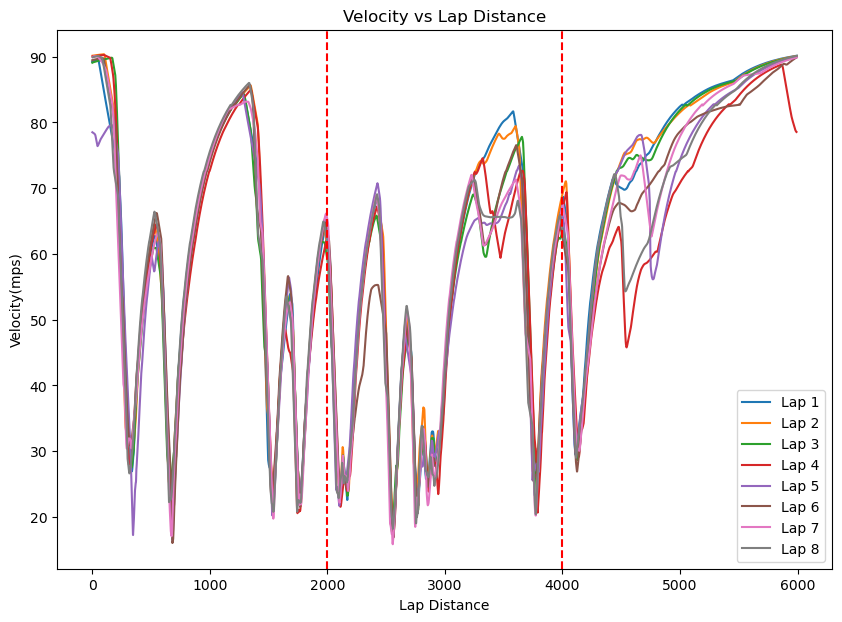

In [100]:
from matplotlib.lines import lineStyles
from pyparsing import lineStart

velocities_per_lap = []
# velocity_plot_data = valid_df_fp3[valid_df_fp3["lapNum"].isin([1, 2])]
for _, g in valid_df_fp3.groupby("lapNum"):
    velocities_per_lap.append(g)

ax = velocities_per_lap[0].plot(x="lap_distance", y="velocity_X", title="Velocity vs Lap Distance", xlabel="Lap Distance", ylabel=f"Velocity(mps)", figsize=(10,7))
for lap_velocity in velocities_per_lap[1::]:
    lap_velocity.plot(x="lap_distance", y="velocity_X", title="Velocity vs Lap Distance", xlabel="Lap Distance", ylabel=f"Velocity(mps)", figsize=(10,7), ax=ax)
plt.axvline(x=max_bin_index/3, color="r", linestyle="--", label="Sector 1")
plt.axvline(x=max_bin_index/3 * 2, color="r", linestyle="--", label="Sector 2")
plt.legend([f"Lap {x}" for x in range(1, len(velocities_per_lap) + 1)])
plt.show()

#### We can see that our lap tends to be fairly clean in Sector 1, but near the middle of Sector 2 and all of Sector 3, our velocity becomes erratic! Let's see if we can uncover what's going on based on our throttle, braking, and location on the track